In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#### We only require Level and Salary columns, since we only want to find if a relation between salary and level

In [4]:
X = df.iloc[:,1:2].values     #X should alwawys be created as a matrix
y = df.iloc[:,-1].values      #y should alsways be created as a vector

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

#### But since the data is very small, we will take the whole data set as training set, so we will not split the data set into train/test sets

#### We'll not do any feature scalling as the Linear regression library will do it automatically

In [7]:
from sklearn.linear_model import LinearRegression

#### Fitting Linear Regression to the dataset

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Fitting Polynomial Regression to the dataset

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_reg = PolynomialFeatures()     #default degree=2
X_poly = poly_reg.fit_transform(X)

In [11]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [12]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [13]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Visualising the Linear Regression results

Text(0.5,1,'Linear Regression result')

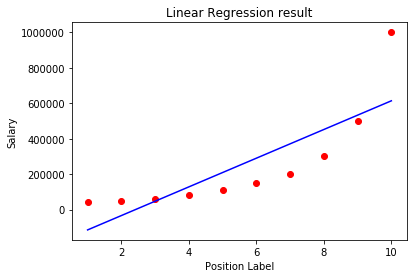

In [14]:
plt.scatter(X,y,c='r')
plt.plot(X, lin_reg.predict(X),c='b')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.title('Linear Regression result')

#### Visualising the Polynomial Regression results

Text(0.5,1,'Polynomial Regression result')

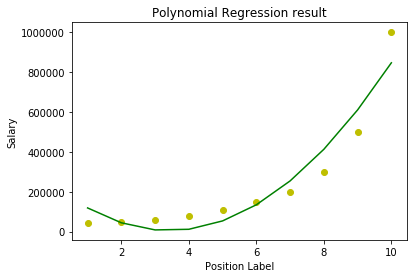

In [15]:
plt.scatter(X,y,c='y')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)),c='g')    
plt.xlabel('Position Label')

plt.ylabel('Salary')
plt.title('Polynomial Regression result')

here we are giving poly_reg.fit_transform(X) instead of x_poly cause, X_poly was already defined for X, whereas here X can be any other values

#### No improving the model by increasing the degree

Text(0.5,1,'Polynomial Regression result')

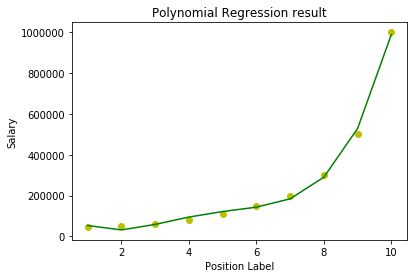

In [16]:
poly_reg = PolynomialFeatures(degree=4)     #default degree=2
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
plt.scatter(X,y,c='y')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)),c='g')    
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.title('Polynomial Regression result')

#### Now to get the real continuous curve 

Text(0.5,1,'Polynomial Regression result')

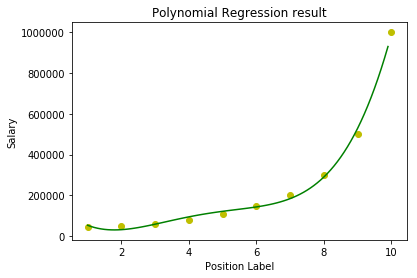

In [17]:
poly_reg = PolynomialFeatures(degree=4)     #default degree=2
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

X_grid = np.arange(min(X),max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,c='y')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),c='g')    
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.title('Polynomial Regression result')

#### Predicting a new result with Linear Regression

In [18]:
lin_reg.predict([[6.5]])

array([330378.78787879])

#### Predicting a new result with Polynomial Regression

In [19]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.4526516])